# Iris Data

## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [5]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [6]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2
                 }
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [7]:
C = 1
clf = svm.SVC(kernel='linear', C = C)

In [8]:
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
clf.predict([[6,2]])

array([2])

In [10]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

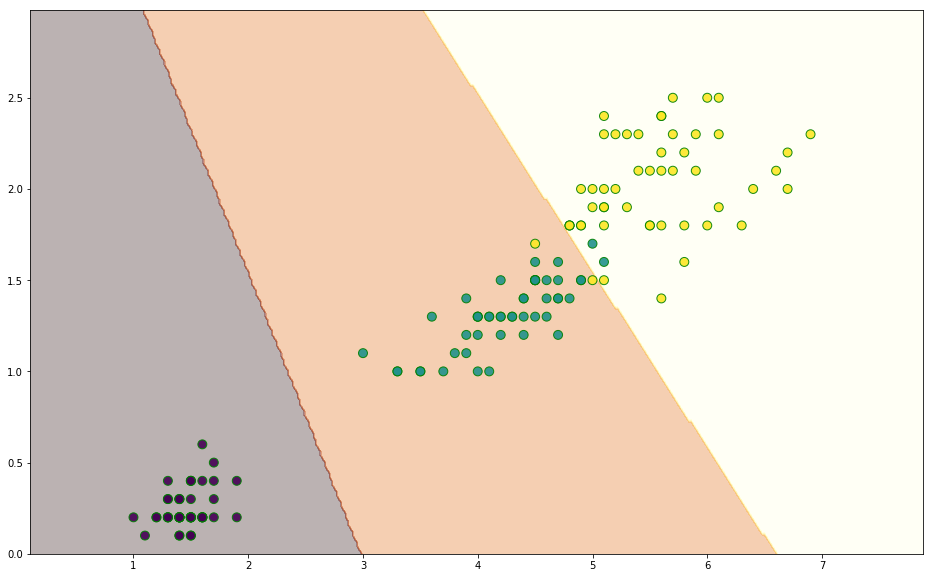

In [11]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha = 0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c = y, s = 80, alpha = 0.9, edgecolors='g')
plt.show()

# Linear SVM Implementation


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [13]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [14]:
C = 1.0
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [16]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')

In [17]:
print(np.mean(res), np.std(res))

0.95013986014 0.0537653103042


In [18]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [19]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]])

In [20]:
print(precision_score(y_train, y_train_pred, average='weighted'), recall_score(y_train, y_train_pred, average='weighted'), f1_score(y_train, y_train_pred, average='weighted'))

0.95 0.95 0.95


## Cross Validation with test set

In [21]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [22]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])

In [23]:
print(precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted'))

0.942222222222 0.933333333333 0.929047619048


# Polynomial Kernel

In [24]:
C = 1
clf = svm.SVC(kernel='poly',degree=3, C = C)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

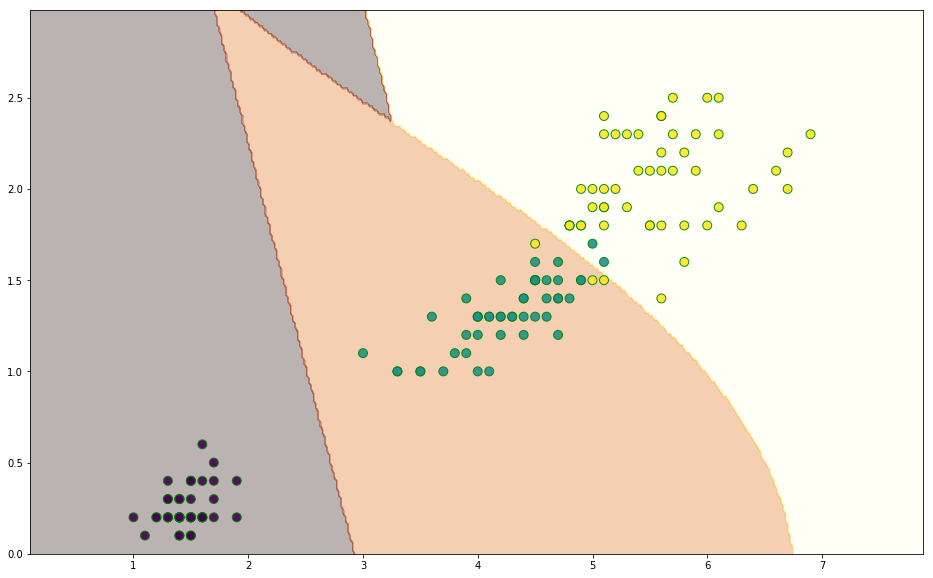

In [26]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha = 0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c = y, s = 80, alpha = 0.9, edgecolors='g')
plt.show()

## Applying on iris data

In [27]:
C = 1.0
clf = svm.SVC(kernel='poly',degree=3, C = C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Cross Validation Score

In [28]:
res = cross_val_score(clf, X_std_train, y_train, cv = 10, scoring='accuracy')

In [29]:
print(np.mean(res), np.std(res))

0.952447552448 0.071232624214


#### Confusion metrics

In [30]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [31]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]])

In [32]:
print(precision_score(y_train, y_train_pred, average='weighted'), recall_score(y_train, y_train_pred, average='weighted'), f1_score(y_train, y_train_pred, average='weighted'))

0.956976744186 0.95 0.950045731707


#### On test Data

In [33]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv = 3)

In [34]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3,  3]])

In [35]:
print(precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted'))

0.91875 0.9 0.888505747126


### Using Gaussian Radial Basis Function

In [38]:
C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C = C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Cross Validation Score

In [40]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print(np.mean(res), np.std(res))

0.95013986014 0.0537653103042


#### Confusion Metrics

In [42]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv = 3)
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]])

In [43]:
print(precision_score(y_train, y_train_pred, average='weighted'), recall_score(y_train, y_train_pred, average='weighted'), f1_score(y_train, y_train_pred, average='weighted'))

0.958603631171 0.958333333333 0.95837164751


#### On test data

In [46]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv = 3)

In [47]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])

In [48]:
print(precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted'))

0.942222222222 0.933333333333 0.929047619048


## Grid Search

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [50]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', gamma=0.1, C =1))])

In [51]:
params = {'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
          'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)}

In [52]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1, cv=3, verbose=1, scoring='accuracy')

In [53]:
svm_grid_rbf.fit(X_std_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [54]:
svm_grid_rbf.best_score_

0.95833333333333337

In [55]:
svm_grid_rbf.best_estimator_

Pipeline(memory=None,
     steps=[('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

#### Performance on test set

In [58]:
y_test_pred = svm_grid_rbf.predict(sc_x.transform(X_test))

In [59]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [61]:
print(precision_score(y_test, y_test_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted'))

1.0 1.0 1.0
